Here I will predict whether a cancer tumor is benign or not by using a Sequential Neural Network for Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading in the data
df = pd.read_csv('cancer_classification.csv')

In [4]:
# Getting an idea of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


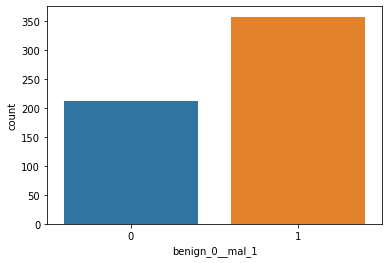

In [5]:
# Lets see the distribution of the dependent variable, because it can influence how we read our classification report and confusion matrix
sns.countplot(x='benign_0__mal_1', data=df)

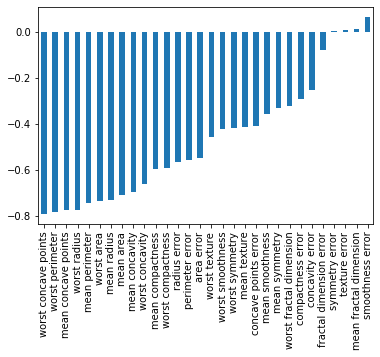

In [6]:
# Here we can see how strongly the variables are correlated with the dependent variable (benign or not)
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

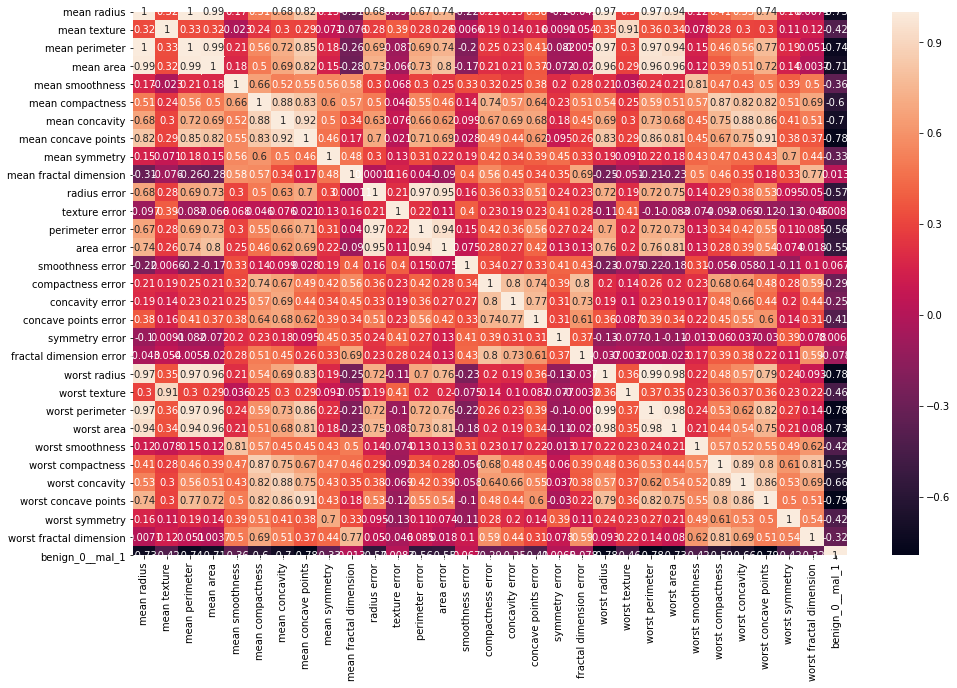

In [8]:
# Once again looking at the correlations (all of them this time). This will help spot multicollinearity
    # this is import because high multicollinearity can negatively impact our model
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [9]:
# Declaring the X and y
X = df.drop('benign_0__mal_1', axis=1).values
y=df['benign_0__mal_1'].values

In [11]:
# For the cross validation. This is to remove data leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=101)

In [12]:
# Scaling the data to ensure some variables dont get too small weights or too big
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
# Importing the libraries to create the Sequantial Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [14]:
# It is good to look at the shape of the data before declaring the neurons and hidden layers
X_train.shape

(426, 30)

In [23]:
# A sequantial model with relu activation. This is an almost linear activation. The last layer (output layer)
    # Has the sigmoid function which is good for classification.
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary Classification --> sigmoid instead
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
# fitting the model
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 578us/sample - loss: 0.7349 - val_loss: 0.7323
Epoch 2/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6846 - val_loss: 0.6780
Epoch 3/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6366 - val_loss: 0.6229
Epoch 4/600
426/426 [==============================] - 0s 62us/sample - loss: 0.5923 - val_loss: 0.5702
Epoch 5/600
426/426 [==============================] - 0s 63us/sample - loss: 0.5474 - val_loss: 0.5187
Epoch 6/600
426/426 [==============================] - 0s 58us/sample - loss: 0.5014 - val_loss: 0.4662
Epoch 7/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4543 - val_loss: 0.4172
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4116 - val_loss: 0.3730
Epoch 9/600
426/426 [==============================] - 0s 59us/sample - loss: 0.3763 - val_loss: 0.3391
Epoch 10/600
426/

426/426 [==============================] - 0s 59us/sample - loss: 0.0545 - val_loss: 0.1891
Epoch 79/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0529 - val_loss: 0.1827
Epoch 80/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0531 - val_loss: 0.1856
Epoch 81/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0544 - val_loss: 0.1773
Epoch 82/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0536 - val_loss: 0.1888
Epoch 83/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0537 - val_loss: 0.1917
Epoch 84/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0541 - val_loss: 0.1962
Epoch 85/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0541 - val_loss: 0.2071
Epoch 86/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0514 - val_loss: 0.1903
Epoch 87/600
426/426 [==============================] - 0s 59us/samp

426/426 [==============================] - 0s 58us/sample - loss: 0.0391 - val_loss: 0.2840
Epoch 156/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0380 - val_loss: 0.2620
Epoch 157/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0360 - val_loss: 0.2885
Epoch 158/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0363 - val_loss: 0.2919
Epoch 159/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0401 - val_loss: 0.3008
Epoch 160/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0395 - val_loss: 0.2541
Epoch 161/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0357 - val_loss: 0.3369
Epoch 162/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0399 - val_loss: 0.2822
Epoch 163/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0352 - val_loss: 0.3200
Epoch 164/600
426/426 [==============================] - 0s 

Epoch 232/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0308 - val_loss: 0.3759
Epoch 233/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0257 - val_loss: 0.3667
Epoch 234/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0262 - val_loss: 0.3782
Epoch 235/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0284 - val_loss: 0.3546
Epoch 236/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0284 - val_loss: 0.3794
Epoch 237/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0274 - val_loss: 0.3827
Epoch 238/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0336 - val_loss: 0.3694
Epoch 239/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0342 - val_loss: 0.3183
Epoch 240/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0358 - val_loss: 0.3944
Epoch 241/600
426/426 [=======================

426/426 [==============================] - 0s 59us/sample - loss: 0.0182 - val_loss: 0.4440
Epoch 310/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0200 - val_loss: 0.4376
Epoch 311/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0199 - val_loss: 0.4067
Epoch 312/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0202 - val_loss: 0.4209
Epoch 313/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0212 - val_loss: 0.4816
Epoch 314/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0186 - val_loss: 0.4224
Epoch 315/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0183 - val_loss: 0.4400
Epoch 316/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0176 - val_loss: 0.4327
Epoch 317/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0176 - val_loss: 0.4291
Epoch 318/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 56us/sample - loss: 0.0149 - val_loss: 0.5266
Epoch 387/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0133 - val_loss: 0.5243
Epoch 388/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0142 - val_loss: 0.5672
Epoch 389/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0120 - val_loss: 0.4872
Epoch 390/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0137 - val_loss: 0.5298
Epoch 391/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0127 - val_loss: 0.5453
Epoch 392/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0124 - val_loss: 0.5114
Epoch 393/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0133 - val_loss: 0.5244
Epoch 394/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0124 - val_loss: 0.5077
Epoch 395/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 56us/sample - loss: 0.0085 - val_loss: 0.5831
Epoch 464/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0088 - val_loss: 0.6068
Epoch 465/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0084 - val_loss: 0.6103
Epoch 466/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0090 - val_loss: 0.6198
Epoch 467/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0089 - val_loss: 0.6010
Epoch 468/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0089 - val_loss: 0.6074
Epoch 469/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0084 - val_loss: 0.5919
Epoch 470/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0083 - val_loss: 0.6316
Epoch 471/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0100 - val_loss: 0.5859
Epoch 472/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 56us/sample - loss: 0.0069 - val_loss: 0.7483
Epoch 540/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0068 - val_loss: 0.6926
Epoch 541/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0065 - val_loss: 0.7460
Epoch 542/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0060 - val_loss: 0.6890
Epoch 543/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0057 - val_loss: 0.7268
Epoch 544/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0059 - val_loss: 0.6805
Epoch 545/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0056 - val_loss: 0.7200
Epoch 546/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0067 - val_loss: 0.7037
Epoch 547/600
426/426 [==============================] - 0s 61us/sample - loss: 0.0053 - val_loss: 0.7424
Epoch 548/600
426/426 [==============================] - 0s 

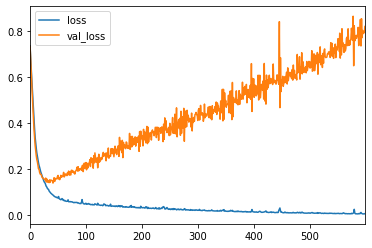

In [25]:
# Plotting the losses as the neural network trains on epochs to see whether we overfit. 
    # If val_loss increases we overfit
losses = pd.DataFrame(model.history.history)
losses.plot()

In [29]:
# Once again creating the model
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))

# Binary Classification --> sigmoid instead
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
# As last time there was overfitting, this time I use Early Stopping. This will stop the training of the model
    # when it starts to overfit. It will do so when val_loss starts to go up over a period of 15 epochs
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

In [31]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 601us/sample - loss: 0.7053 - val_loss: 0.6962
Epoch 2/600
426/426 [==============================] - 0s 58us/sample - loss: 0.6581 - val_loss: 0.6536
Epoch 3/600
426/426 [==============================] - 0s 56us/sample - loss: 0.6193 - val_loss: 0.6107
Epoch 4/600
426/426 [==============================] - 0s 61us/sample - loss: 0.5795 - val_loss: 0.5706
Epoch 5/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5383 - val_loss: 0.5224
Epoch 6/600
426/426 [==============================] - 0s 58us/sample - loss: 0.4954 - val_loss: 0.4752
Epoch 7/600
426/426 [==============================] - 0s 56us/sample - loss: 0.4517 - val_loss: 0.4280
Epoch 8/600
426/426 [==============================] - 0s 59us/sample - loss: 0.4093 - val_loss: 0.3822
Epoch 9/600
426/426 [==============================] - 0s 54us/sample - loss: 0.3670 - val_loss: 0.3410
Epoch 10/600
426/

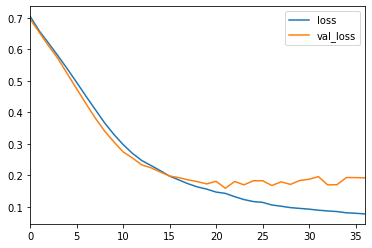

In [32]:
# The early stopping kicked in pretty early. This time we dont see val_loss not going up too much. This is because
    # early stopping stopped the training early as it sensed it started to overfit
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:
# Dropout is a regularization technique to reduce overfitting. This can help to train the model further while
    # evading overfitting and thus getting better results
from tensorflow.keras.layers import Dropout

In [40]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(rate=.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(rate=.5))

# Binary Classification --> sigmoid instead
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 686us/sample - loss: 0.7356 - val_loss: 0.7131
Epoch 2/600
426/426 [==============================] - 0s 66us/sample - loss: 0.7003 - val_loss: 0.6976
Epoch 3/600
426/426 [==============================] - 0s 59us/sample - loss: 0.6824 - val_loss: 0.6880
Epoch 4/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6861 - val_loss: 0.6783
Epoch 5/600
426/426 [==============================] - 0s 68us/sample - loss: 0.6717 - val_loss: 0.6679
Epoch 6/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6558 - val_loss: 0.6581
Epoch 7/600
426/426 [==============================] - 0s 63us/sample - loss: 0.6500 - val_loss: 0.6443
Epoch 8/600
426/426 [==============================] - 0s 66us/sample - loss: 0.6345 - val_loss: 0.6248
Epoch 9/600
426/426 [==============================] - 0s 70us/sample - loss: 0.6160 - val_loss: 0.5986
Epoch 10/600
426/

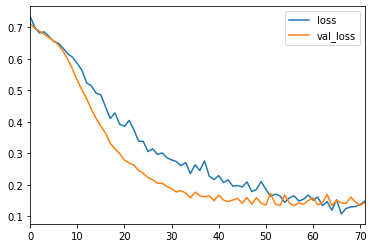

In [44]:
# The model trained for more epochs this time and reducing val_loss much further.(.2 against .15 approximately)
losses = pd.DataFrame(model.history.history)
losses.plot()

In [45]:
# As the model has now been improved its time to make the predictions
predictions = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        55
           1       0.99      0.93      0.96        88

    accuracy                           0.95       143
   macro avg       0.94      0.96      0.95       143
weighted avg       0.95      0.95      0.95       143



In [90]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 8 80]]


The results are pretty good. An f1-score of 95!

In [48]:
# Lets see other measures of how well the model performs
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [49]:
mean_absolute_error(y_test,predictions)

0.04895104895104895

In [93]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


The model was able to have a mean absolute error of only 4.8% (.048). Thus, its able to very accurately predict whether a tumor is benign or not based on the data